In [7]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


# Imports

In [1]:
%matplotlib widget
import neighbor_core_20240806 as nc
from neighbor_core_20240806 import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Initialize a cluster and view it

In [3]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

# view it

In [4]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Plot histogram

In [5]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

# Get CN reports and save to excel

In [6]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False);
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006661818935
-- Average CN: 5.2
-- Info: 
4 atoms have CN of 3
11 atoms have CN of 6
-- Tolerance: 0.1 

-- Distance: 3.759464103600722
-- Average CN: 2.4
-- Info: 
12 atoms have CN of 2
3 atoms have CN of 4
-- Tolerance: 0.1 

-- Distance: 4.0161487745681885
-- Average CN: 2.4
-- Info: 
10 atoms have CN of 2
4 atoms have CN of 3
1 atoms have CN of 4
-- Tolerance: 0.1 

-- Distance: 4.450974934970656
-- Average CN: 4.266666666666667
-- Info: 
14 atoms have CN of 4
1 atoms have CN of 8
-- Tolerance: 0.1 

-- Distance: 4.861048023898767
-- Average CN: 0.9333333333333333
-- Info: 
4 atoms have CN of 0
8 atoms have CN of 1
3 atoms have CN of 2
-- Tolerance: 0.1 

Bond Type: Pb-Pb
-- Distance: 3.389999918388575
-- Average CN: 0.8
-- Info: 
4 atoms have CN of 0
10 atoms have CN of 1
1 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 3.895359489312166
-- Average CN: 4.266666666666667
-- Info: 
14 atoms have CN of 4
1 atoms have CN of 8
-- Tolerance: 0.1 



# remove undercoordinated atoms

In [7]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_threshold=7, bond_range=4, self_apply=True)
cluster.view_xyz(label=True, show_symbol=True)

CN atom not provided. Using O as the CN atom.
Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False);
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006684677769
-- Average CN: 6.0
-- Info: 
11 atoms have CN of 6
-- Tolerance: 0.1 

-- Distance: 3.7594640623910167
-- Average CN: 2.5454545454545454
-- Info: 
8 atoms have CN of 2
3 atoms have CN of 4
-- Tolerance: 0.1 

-- Distance: 4.016148722271057
-- Average CN: 2.5454545454545454
-- Info: 
6 atoms have CN of 2
4 atoms have CN of 3
1 atoms have CN of 4
-- Tolerance: 0.1 

-- Distance: 4.450974886404176
-- Average CN: 4.363636363636363
-- Info: 
10 atoms have CN of 4
1 atoms have CN of 8
-- Tolerance: 0.1 

-- Distance: 4.861047941704461
-- Average CN: 0.9090909090909091
-- Info: 
4 atoms have CN of 0
4 atoms have CN of 1
3 atoms have CN of 2
-- Tolerance: 0.1 

Bond Type: Pb-Pb
-- Distance: 3.389999918388575
-- Average CN: 1.0909090909090908
-- Info: 
10 atoms have CN of 1
1 atoms have CN of 2
-- Tolerance: 0.1 

-- Distance: 3.8953594869263837
-- Average CN: 2.909090909090909
-- Info: 
8 atoms have CN of 2
2 atoms have CN of 4
1 atoms have CN of 

# Example 2: Polynomial fits of different shells

## select a cif file

In [32]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [37]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
# Initialize dictionaries to store results for each shell with descriptive names
Pt_CNs_all = {'first_shell': [], 'second_shell': [], 'third_shell': [], 'fourth_shell': []}
Pt_bondlengths_all = {'first_shell': [], 'second_shell': [], 'third_shell': [], 'fourth_shell': []}
num_atoms = []
sizes_all = []
# Define the range for expansion
expansion_range = range(5, 6)  # Adjust the range as needed

# Loop through the expansion range
for i in expansion_range:
    # Expand the cluster
    expanded_cluster = cif_cluster.expand_cif((i, i, i), self_apply=True)
    
    # Create a new cluster with the expanded structure
    Pt_new_cluster = ClusterNeighbor()
    Pt_new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    
    # Shrink the cluster size
    Pt_new_cluster.shrink_cluster_size(new_radius=Pt_new_cluster.get_cluster_size() * 0.7, self_apply=True)
    
    # Optional: Visualize the cluster
    Pt_new_cluster.view_xyz(label=False)
    
    # Get the CN summary with specified tolerance and bond range
    Pt_new_cluster.get_CN_summary_all(tolerance=0.1, bond_range=7, printit=True)
    
    # Mapping from index to shell names
    shell_names = ['first_shell', 'second_shell', 'third_shell', 'fourth_shell']
    
    # Save average bond distances and coordination numbers for each shell
    for idx in range(4):  # Adjust index to handle first four shells
        if idx < len(Pt_new_cluster.CN_summary['Pt-Pt'].keys()):
            average_bd = list(Pt_new_cluster.CN_summary['Pt-Pt'].keys())[idx]
            average_cn = Pt​⬤

In [6]:
Pt_CNs_all = []
Pt_bondlengths_all = []
num_atoms = []
sizes_all = []

Pt_cluster = ClusterNeighbor()
Pt_cluster.load_xyz(path = "test_Pt/Ptfoil_243678.cif")

for i in range(5, 6):
    expanded_cluster = Pt_cluster.expand_cif((i, i, i), self_apply=False)
    Pt_new_cluster = ClusterNeighbor()
    Pt_new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    Pt_new_cluster.shrink_cluster_size(new_radius=Pt_new_cluster.get_cluster_size()*0.7, self_apply=True)
    Pt_new_cluster.view_xyz(label=False)
    Pt_new_cluster.get_CN_summary_all(tolerance=0.1, bond_range=7, printit=True) 
    # Pt_new_cluster.atoms.set_pbc(False)
    
    average_bd = list(Pt_new_cluster.CN_summary['Pt-Pt'].keys())[0] # here 0 or 1 or 2 or 3, depending on the shell
    average_cn = Pt_new_cluster.CN_summary['Pt-Pt'][average_bd]['average_CN'] 
    Pt_CNs_all.append(average_cn)
    Pt_bondlengths_all.append(average_bd)
    num_atoms.append(len(Pt_new_cluster.atoms))
    sizes_all.append(Pt_new_cluster.get_cluster_size())
print(Pt_CNs_all)

NameError: name 'ClusterNeighbor' is not defined

In [3]:
Pt_CNs_all = []
Pt_bondlengths_all = []
num_atoms = []
sizes_all = []

Pt_cluster = ClusterNeighbor()
Pt_cluster.load_xyz(path = "test_Pt/Ptfoil_243678.cif")

for i in range(2, 5):
    expanded_cluster = Pt_cluster.expand_cif((i, i, i), self_apply=False)
    Pt_new_cluster = ClusterNeighbor()
    Pt_new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    Pt_new_cluster.shrink_cluster_size(new_radius=Pt_new_cluster.get_cluster_size()*0.7, self_apply=True)
    Pt_new_cluster.view_xyz(label=False)
    Pt_new_cluster.get_CN_summary_all(tolerance=0.1, bond_range=3, printit=True)
    # Pt_new_cluster.atoms.set_pbc(False)
    
    average_bd = list(Pt_new_cluster.CN_summary['Pt-Pt'].keys())[0]
    average_cn = Pt_new_cluster.CN_summary['Pt-Pt'][average_bd]['average_CN'] 
    Pt_CNs_all.append(average_cn)
    Pt_bondlengths_all.append(average_bd)
    num_atoms.append(len(Pt_new_cluster.atoms))
    sizes_all.append(Pt_new_cluster.get_cluster_size())
print(Pt_CNs_all)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 9.000
Coordination numbers around 2.774 Å for Pt-Pt
4 atoms have CN of 3


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 7.909
Coordination numbers around 2.774 Å for Pt-Pt
4 atoms have CN of 3
24 atoms have CN of 7
12 atoms have CN of 10
4 atoms have CN of 12


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Pt-Pt
1 length: 2.774  CN: 9.600
Coordination numbers around 2.774 Å for Pt-Pt
12 atoms have CN of 5
12 atoms have CN of 7
24 atoms have CN of 8
12 atoms have CN of 9
24 atoms have CN of 10
12 atoms have CN of 11
44 atoms have CN of 12
[3.0, 7.909090909090909, 9.6]


# rewrite using expand_to_sphere

In [18]:
Pt_CNs_all = []
Pt_bondlengths_all = []
num_atoms = []
sizes_all = []

Pt_cluster = ClusterNeighbor()
Pt_cluster.load_xyz(path = "test_Pt/Ptfoil_243678.cif")

sizes = np.hstack([np.arange(5, 20, 1),np.arange(20, 30, 10)])
sizes = np.arange(5, 20, 2)

for i in sizes:
    print("Size: ", i)
    expanded_cluster = Pt_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    Pt_new_cluster = ClusterNeighbor()
    Pt_new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    Pt_new_cluster.view_xyz(label=False)
    # Pt_new_cluster.atoms.set_pbc(False)
    Pt_new_cluster.get_CN_summary_all(tolerance=0.1, bond_range=3, printit=False)
    
    average_bd = list(Pt_new_cluster.CN_summary['Pt-Pt'].keys())[0]
    average_cn = Pt_new_cluster.CN_summary['Pt-Pt'][average_bd]['average_CN'] 
    size = Pt_new_cluster.get_cluster_size()
    Pt_CNs_all.append(average_cn)
    Pt_bondlengths_all.append(average_bd)
    num_atoms.append(len(Pt_new_cluster.atoms))
    sizes_all.append(size)
    print("Average CN: ", average_cn)
    print("Size: ", size)
    print("Number of atoms: ", len(Pt_new_cluster.atoms))
    
# print(Pt_CNs_all)

Size:  5


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  3.0
Size:  1.387046519839908
Number of atoms:  4
Size:  7


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  7.5
Size:  3.1015303063165454
Number of atoms:  16
Size:  9


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  6.857142857142857
Size:  4.161139559519724
Number of atoms:  28
Size:  11


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  7.909090909090909
Size:  5.001067348736667
Number of atoms:  44
Size:  13


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  8.25
Size:  6.045995609971944
Number of atoms:  80
Size:  15


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  8.76923076923077
Size:  6.935232599199541
Number of atoms:  104
Size:  17


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  9.2
Size:  8.437074598662738
Number of atoms:  180
Size:  19


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Average CN:  9.85
Size:  9.304590918949636
Number of atoms:  240


In [19]:
print(sizes_all)
print(Pt_CNs_all)

[1.387046519839908, 3.1015303063165454, 4.161139559519724, 5.001067348736667, 6.045995609971944, 6.935232599199541, 8.437074598662738, 9.304590918949636]
[3.0, 7.5, 6.857142857142857, 7.909090909090909, 8.25, 8.76923076923077, 9.2, 9.85]


# in terms of diameter

  Coefficient      Value
0    Constant -20.271548
1         x^1  14.776686
2         x^2  -3.007019
3         x^3   0.288955
4         x^4  -0.013073
5         x^5   0.000225


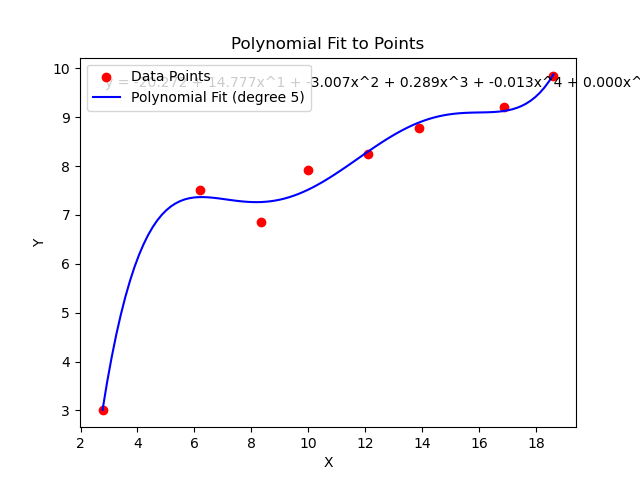

In [16]:
from neighbor_core_20240806 import fit_polynomial, fit_logarithmic
polynomial = fit_polynomial(np.array(sizes_all) * 2, Pt_CNs_all, 5)
# polynomial = fit_polynomial(num_atoms, Pt_CNs_all, 2)

[ 3.53333742e-10 -8.96141376e-08  9.22883872e-06 -4.96190981e-04
  1.49549377e-02 -2.54994520e-01  2.45144420e+00 -2.04897591e+00]
  Coefficient         Value
0         x^7  3.533337e-10
1         x^6 -8.961414e-08
2         x^5  9.228839e-06
3         x^4 -4.961910e-04
4         x^3  1.495494e-02
5         x^2 -2.549945e-01
6         x^1  2.451444e+00
7    Constant -2.048976e+00


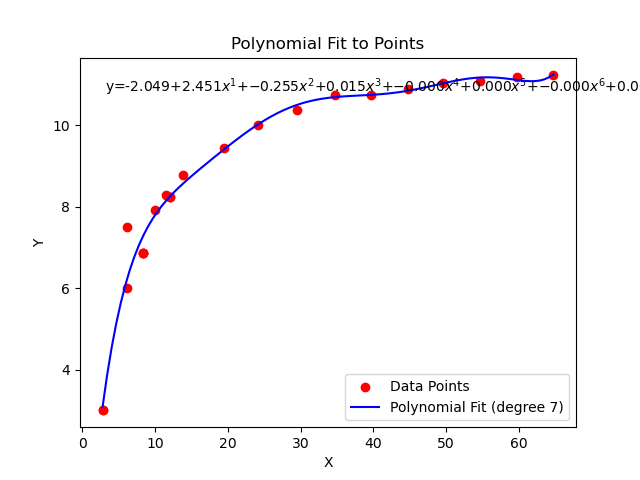

In [17]:
# from neighbor_core_20240806 import fit_polynomial, fit_logarithmic
polynomial = fit_polynomial(np.array(sizes_all) * 2, Pt_CNs_all, 7)
# polynomial = fit_polynomial(num_atoms, Pt_CNs_all, 2)

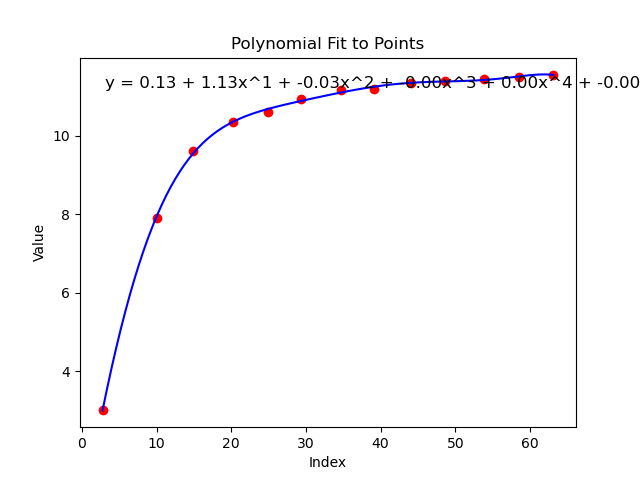

In [13]:
from neighbor_core_20240806 import fit_polynomial, fit_logarithmic
polynomial = fit_polynomial(np.array(sizes_all) * 2, Pt_CNs_all, 7)
# polynomial = fit_polynomial(num_atoms, Pt_CNs_all, 2)

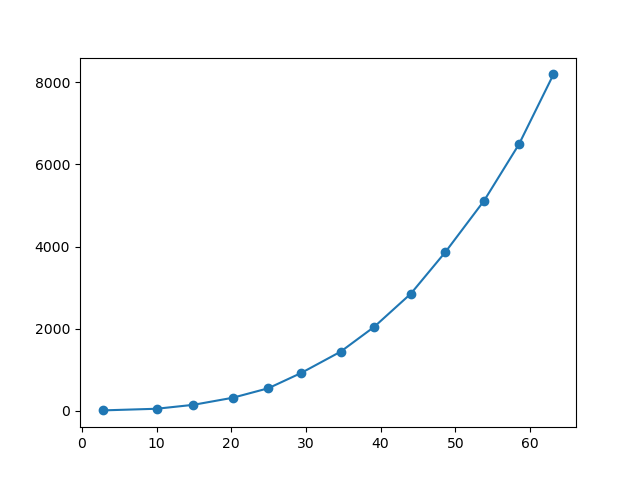

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.array(sizes_all) * 2, num_atoms, label='data')
plt.plot(np.array(sizes_all) * 2, num_atoms, label='data')